<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
CS6501 - MACHINE LEARNING AND APPLICATIONS
#**Business Analytics - MSc**
ET5003 - MACHINE LEARNING APPLICATIONS 
##***Annual Repeat***
###Instructor: Enrique Naredo

###RepMLA_3.2


In [1]:
#@title Current Date
Today = '2021-08-02' #@param {type:"date"}


In [2]:
#@markdown ---
#@markdown ### Enter your details here:
Student_ID = "" #@param {type:"string"}
Student_full_name = "" #@param {type:"string"}
#@markdown ---

In [3]:
#@title Notebook information
Notebook_type = 'Example' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = 'Draft' #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

Jupyter notebook refurbished from the original [fuzzy_classifier.ipynb](https://github.com/amiseo/Fuzzy-min-max-classifier/blob/master/fuzzy_classifier.ipynb) and [fuzzy.py](https://github.com/amiseo/Fuzzy-min-max-classifier/blob/master/fuzzy.py)

In [4]:
# install Fuzzy Classificator
!pip install FuzzyClassificator
!pip install fuzzy

     |████████████████████████████████| 546 kB 4.8 MB/s 
  Created wheel for fuzzy: filename=Fuzzy-1.2.2-cp37-cp37m-linux_x86_64.whl size=161773 sha256=422a260aca48d94e4ceda4c54e7f8f893807551b2aed5c02bf6cd71e3e061227
  Stored in directory: /root/.cache/pip/wheels/c8/52/8a/bb2d05fbf343752a8546682cb5b2d775cc0d1f27f6c43f95dd
Successfully built fuzzy


In [5]:
# import libraries

from fuzzy import *
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
import numpy as np
from matplotlib import animation
import os
import io
import base64
from IPython.display import HTML

In [6]:
# mount drive to access dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Iris dataset

How to upload data to google colab: [here.](https://www.youtube.com/watch?v=-1jFfadz7bo)

In [7]:
## data path in Drive
# upload the 'iris.csv' into your Google drive
# copy and paste the path to the dataset
iris_data = '/content/drive/MyDrive/Colab Notebooks/ML_APP_UL/WEEK_3/iris.csv'

In [8]:
# read iris_data file
df = pd.read_csv(iris_data)
# raw dataset
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [9]:
# adding labels to columns
df.columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
# show first rows
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


### Binary Classification

In [10]:
# iris dataset has three classes
print(df['class'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [11]:
## convert it into binary classification problem
# in this case 'Iris-virginica' is removed
df = df[~(df['class']=='Iris-virginica')]
# show two classes
print(df['class'].unique())

['Iris-setosa' 'Iris-versicolor']


In [12]:
## assigning a binary value as a class label

# class 0
df.replace(to_replace='Iris-setosa', value=0, inplace=True)
# class 1
df.replace(to_replace='Iris-versicolor', value=1, inplace=True)

# show first rows
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


### Random Sampling

In [13]:
## Shuffle
# each time shows different results

# frac=1 means return 'all' rows (in random order)
df_s = df.sample(frac=1)

# show first rows (in random order)
df_s.head()

,sepal-length,sepal-width,petal-length,petal-width,class
30,5.4,3.4,1.5,0.4,0
22,5.1,3.3,1.7,0.5,0
72,6.1,2.8,4.7,1.2,1
65,5.6,3.0,4.5,1.5,1
64,6.7,3.1,4.4,1.4,1


## Normalization

In [14]:
## extracting the feature values

# In this particular case we'll use just 2 features
# to use the Animator class
feature_names = ['sepal-length', 'petal-length']
feature_values = df_s[feature_names].values

# show first rows
feature_values[0:9]

array([[5.4, 1.5],
       [5.1, 1.7],
       [6.1, 4.7],
       [5.6, 4.5],
       [6.7, 4.4],
       [5. , 1.6],
       [6.1, 4. ],
       [5. , 1.2],
       [4.6, 1.5]])

In [15]:
## getting max & min values

# axis=0, acts on all the ROWS in each COLUMN
# axis=1, acts on all the COLUMNS in each ROW

# minimum from the features
f_min = np.min(feature_values, axis=0)
# maximum from the features
f_max = np.max(feature_values, axis=0)


# show min & max values
print(f_min)
print(f_max)

[4.3 1. ]
[7.  5.1]


In [16]:
## Normalizing feature values to fall in [0,1]

# normalized values 
feature_norm = (feature_values - f_min) / (f_max - f_min)

# show first rows
feature_norm[0:9]

array([[0.40740741, 0.12195122],
       [0.2962963 , 0.17073171],
       [0.66666667, 0.90243902],
       [0.48148148, 0.85365854],
       [0.88888889, 0.82926829],
       [0.25925926, 0.14634146],
       [0.66666667, 0.73170732],
       [0.25925926, 0.04878049],
       [0.11111111, 0.12195122]])

### Training & Test sets

In [17]:
## Training & Test sets percentages

# percentage of training [0,1]
train_perc = 0.70

# number of items in the dataset
data_size = len(feature_norm)

#feature_norm
train_size = round(data_size*train_perc)
test_size = data_size - train_size

print('Entire dataset size: ', data_size)
print('training set size: ', train_size)
print('test set size: ', test_size)


Entire dataset size:  99
training set size:  69
test set size:  30


In [18]:

# class labels
class_label = df_s['class'].values

# training set
X_train = feature_norm[0:train_size]
Y_train = class_label[0:train_size]

# test set
X_test = feature_norm[train_size:]
Y_test = class_label[train_size:]

# be sure the last from training is not
# the same as the first from test
print(X_train[train_size-1], Y_train[train_size-1])
print(X_test[0], Y_test[0])


[0.40740741 0.17073171] 0
[0.40740741 0.12195122] 0


In [19]:
X_train.shape, Y_train.shape

((69, 2), (69,))

In [20]:
X_test.shape, Y_test.shape

((30, 2), (30,))

### Classes

In [21]:
class Animator:
	'''
	An animator class only for animating 2D hyperboxes
	'''

	def __init__(self, box_history, train_patterns, classes, frame_rate, exp_bound, sensitivity,
				 filename='fuzzy_animation', verbose=True):
		# TODO: Customizable parameters
		assert len(box_history) == len(train_patterns), '{} (box-history) != {} (train_patterns)'.format(len(box_history), len(train_patterns))
		assert len(train_patterns[0][0]) == 2, 'Only 2D points are allowed.'

		self.fig = plt.figure()
		self.fig.set_dpi(100)
		self.fig.set_size_inches(7, 6.5)
		self.fig.suptitle('Fuzzy min-max classifier')
		if filename == '':
			filename = 'fuzzy_animation'
		self.filename = filename + '.mp4'
		self.box_history = box_history
		self.train_patterns = train_patterns
		self.classes = classes
		self.verbose = verbose

		self.frames = np.ravel(np.array([[i]*frame_rate for i in range(len(box_history))]))
		self.total = len(box_history)

		self.ax = plt.axes(xlim=(0, 1), ylim=(0, 1))
		self.ax.set_title('θ = {} and γ = {}'.format(exp_bound, sensitivity))
		self.rectangles = []
		self.scatters = []
		self.colormap = [np.array([255, 0, 0]), np.array([0, 0, 255])] + [self.__get_random_color(color) for i in range(len(np.unique(classes)) - 2)]

		for i in range((len(train_patterns))):
			x, y = train_patterns[i]
			y = int(y)
			if y == 0:
				self.scatters.append(plt.scatter(-1, -1, c=tuple(self.colormap[y] / 255)))

			else:
				self.scatters.append(plt.scatter(-1, -1, c=tuple(self.colormap[y] / 255)))
    
		for _class in classes:
			if _class == 0:
				self.rectangles.append(plt.Rectangle((0, 0), 0, 0, fill=False, color='r')) 
			else:
				self.rectangles.append(plt.Rectangle((0, 0), 0, 0, fill=False, color='b'))

		if self.verbose:
			print('{:<20}: {:<10}'.format('Total Boxes', len(self.rectangles)))
			print('{:<20}: {:<10}'.format('Points to plot', len(self.scatters)))


	def __get_random_color(self):
		r = lambda: random.randint(0,255)
		return np.array([r(), r(), r()])


	def box_to_rect(self, box):
		vj, wj = box
		height = wj[1] - vj[1]
		width = wj[0] - vj[0]
		return tuple(vj), width, height


	def init(self):
		for i in self.rectangles:
			self.ax.add_patch(i)

		return tuple(self.rectangles) + tuple(self.scatters)


	def _animate(self, i):
		hyperboxes = self.box_history[i]
		# Plot training point
		x, y = self.train_patterns[i]
		self.scatters[i].set_offsets(tuple(x))
		for box in range(len(hyperboxes)):
			base, width, height = self.box_to_rect(hyperboxes[box])
			self.rectangles[box].set_xy(base)
			if width == 0:
				width = 0.02
			if height == 0:
				height = 0.02

			self.rectangles[box].set_width(width)
			self.rectangles[box].set_height(height)

		if self.verbose:
			print('{:<20}: {}/{}'.format('Animating frame', i+1, self.total), end='\r')

		return tuple(self.rectangles) + tuple(self.scatters)


	def animate(self):
		'''
		Main function to start animation
		'''

		anim = animation.FuncAnimation(self.fig, self._animate, 
							   init_func = self.init, 
							   frames = self.frames, 
							   interval = 20,
							   blit = True)

		anim.save(self.filename, fps=30, 
				  extra_args=['-vcodec', 'h264', 
							  '-pix_fmt', 'yuv420p'])

		if self.verbose:
			print('Animation complete! Video saved at {}'.format(os.path.join(os.getcwd(), self.filename)))

In [22]:
class FuzzyMMC:

	def __init__(self, sensitivity=1, exp_bound=1, animate=False):
		'''
		Constructor for FuzzyMMC class
		'''
		self.sensitivity = sensitivity
		self.hyperboxes = None
		self.isanimate = animate
		self.classes = np.array([])
		self.exp_bound = exp_bound

		if self.animate:
			self.box_history = []
			self.train_patterns = []


	def membership(self, pattern):
		'''
		Calculates membership values a pattern
		
		Returns an ndarray of membership values of all hyperboxes
		'''
		min_pts = self.hyperboxes[:, 0, :]
		max_pts = self.hyperboxes[:, 1, :]
		
		a = np.maximum(0, (1 - np.maximum(0, (self.sensitivity * np.minimum(1, pattern - max_pts)))))
		b = np.maximum(0, (1 - np.maximum(0, (self.sensitivity * np.minimum(1, min_pts - pattern)))))

		return np.sum(a + b, axis=1) / (2 * len(pattern))


	def overlap_contract(self, index):
		'''
		Check if any classwise dissimilar hyperboxes overlap
		'''
		contracted = False
		for test_box in range(len(self.hyperboxes)):

			if self.classes[test_box] == self.classes[index]:
				# Ignore same class hyperbox overlap
				continue
	
			expanded_box = self.hyperboxes[index]
			box = self.hyperboxes[test_box]

			## TODO: Refactor for vectorization
			vj, wj = expanded_box
			vk, wk = box

			delta_new = delta_old = 1
			min_overlap_index = -1
			for i in range(len(vj)):
				if vj[i] < vk[i] < wj[i] < wk[i]:
					delta_new = min(delta_old, wj[i] - vk[i])

				elif vk[i] < vj[i] < wk[i] < wj[i]:
					delta_new = min(delta_old, wk[i] - vj[i])

				elif vj[i] < vk[i] < wk[i] < wj[i]:
					delta_new = min(delta_old, min(wj[i] - vk[i], wk[i] - vj[i]))

				elif vk[i] < vj[i] < wj[i] < wk[i]:
					delta_new = min(delta_old, min(wj[i] - vk[i], wk[i] - vj[i]))

				if delta_old - delta_new > 0:
					min_overlap_index = i
					delta_old = delta_new

			if min_overlap_index >= 0:
				i = min_overlap_index
				# We need to contract the expanded box
				if vj[i] < vk[i] < wj[i] < wk[i]:
					vk[i] = wj[i] = (vk[i] + wj[i])/2

				elif vk[i] < vj[i] < wk[i] < wj[i]:
					vj[i] = wk[i] = (vj[i] + wk[i])/2

				elif vj[i] < vk[i] < wk[i] < wj[i]:
					if (wj[i] - vk[i]) > (wk[i] - vj[i]):
						vj[i] = wk[i]

					else:
						wj[i] = vk[i]

				elif vk[i] < vj[i] < wj[i] < wk[i]:
					if (wk[i] - vj[i]) > (wj[i] - vk[i]):
						vk[i] = wj[i]

					else:
						wk[i] = vj[i]

				self.hyperboxes[test_box] = np.array([vk, wk])
				self.hyperboxes[index] = np.array([vj, wj])
				contracted = True

		return contracted



	def train_pattern(self, X, Y):
		'''
		Main function that trains a fuzzy min max classifier
		Note:
		Y is a one-hot encoded target variable
		'''
		target = Y
		
		if target not in self.classes:
			
			# Create a new hyberbox
			if self.hyperboxes is not None:
				self.hyperboxes = np.vstack((self.hyperboxes, np.array([[X, X]])))
				self.classes = np.hstack((self.classes, np.array([target])))

			else:
				self.hyperboxes = np.array([[X, X]])
				self.classes = np.array([target])

			if self.isanimate:
				self.box_history.append(np.copy(self.hyperboxes))
				self.train_patterns.append((X, Y))
		else:
			
			memberships = self.membership(X)
			memberships[np.where(self.classes != target)] = 0
			memberships = sorted(list(enumerate(memberships)), key=lambda x: x[1], reverse=True)
			
			# Expand the most suitable hyperbox
			count = 0
			while True:
				index = memberships[count][0]
				min_new = np.minimum(self.hyperboxes[index, 0, :], X)
				max_new = np.maximum(self.hyperboxes[index, 1, :], X)
				
				if self.exp_bound * len(np.unique(self.classes)) >= np.sum(max_new - min_new):
					self.hyperboxes[index, 0] = min_new
					self.hyperboxes[index, 1] = max_new
					break
				else:
					count += 1

				if count == len(memberships):
					self.hyperboxes = np.vstack((self.hyperboxes, np.array([[X, X]])))
					self.classes = np.hstack((self.classes, np.array([target])))
					index = len(self.hyperboxes) - 1
					break

			# Overlap test
			if self.isanimate:
				self.box_history.append(np.copy(self.hyperboxes))
				self.train_patterns.append((X, Y))

			contracted = self.overlap_contract(index)
			
			if self.isanimate and contracted:	
				self.box_history.append(np.copy(self.hyperboxes))
				self.train_patterns.append((X, Y))


	def fit(self, X, Y):
		'''
		Wrapper for train_pattern
		'''
		for x, y in zip(X, Y):
			self.train_pattern(x, y)


	def predict(self, X):
		'''
		Predict the class of the pattern X
		'''
		classes = np.unique(self.classes)
		results = []
		memberships = self.membership(X)
		max_prediction = 0
		pred_class = 0
		for _class in classes:
			mask = np.zeros((len(self.hyperboxes),))
			mask[np.where(self.classes == _class)] = 1
			p = memberships * mask
			prediction, class_index = np.max(p), np.argmax(p)
			if prediction > max_prediction:
				max_prediction = prediction
				pred_class = class_index

		return max_prediction, self.classes[pred_class] 


	def score(self, X, Y):
		'''
		Scores the classifier
		'''
		count = 0
		for x, y in zip(X, Y):
			_, pred = self.predict(x)
			if y == pred:
				count += 1

		return count / len(Y)


	def animate(self, frame_rate=10, filename='', verbose=True):
		'''
		To make a video of the classifier training.
		NOTE: Only possible when working with 2 dimensional patterns
		'''
		if self.isanimate:
			animator = Animator(box_history=self.box_history,
								train_patterns=self.train_patterns,
								classes=self.classes,
								frame_rate=frame_rate,
								exp_bound=self.exp_bound,
								sensitivity=self.sensitivity,
								filename=filename,
								verbose=verbose)

			animator.animate()

			return animator.filename

		else:
			raise Exception('No animation data was collected! Create a fuzzy classifier instance with animate=True')

### Fuzzy Classifier

In [23]:
clf2 = FuzzyMMC(sensitivity=1, exp_bound=0.1, animate=True)

In [24]:
clf2.fit(X_train, Y_train)
print(X_train[0])

[0.40740741 0.12195122]


In [25]:
clf2.score(X_test, Y_test)

1.0

In [26]:
print(clf2)
print(clf2)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Total Boxes         : 16        
Points to plot      : 72        
Animation complete! Video saved at /content/fuzzy_animation.mp4


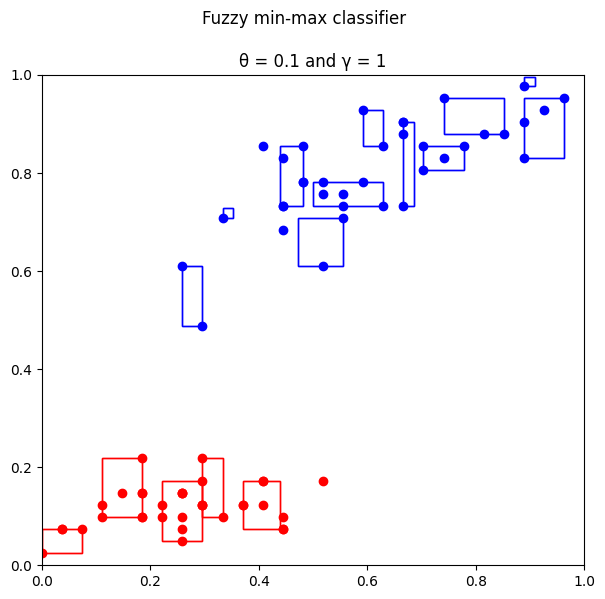

In [27]:
_ = clf2.animate()


### video

In [28]:

video = io.open('/content/fuzzy_animation.mp4', 'r+b').read()

encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

## Generated dataset

In [29]:
def rand_uniform(x, y):
    return random.random() * (y- x) + x

def gen_circle(num_samples):
    num_samples = num_samples
    radius = 5
    points = []
    noise = 0.5
    
    def get_label(x, y):
        dist = math.sqrt(x ** 2 + y ** 2)
        return 0 if dist < radius * 0.5 else 1
    
    for i in range(num_samples//2):
        r = rand_uniform(0, radius * 0.5)
        angle = rand_uniform(0, 2 * math.pi)
        x = r * math.sin(angle)
        y = r * math.cos(angle)
        noiseX = rand_uniform((-1)*radius, radius) * noise
        noiseY = rand_uniform((-1)*radius, radius) * noise
        #label = get_label(noiseX, noiseY)
        label = 0
        points.append((x, y, label))
    
    for i in range(num_samples // 2):
        r = rand_uniform(radius * 0.7, radius)
        angle = rand_uniform(0, 2 * math.pi)
        x = r * math.sin(angle)
        y = r * math.cos(angle)
        noiseX = rand_uniform((-1)*radius, radius) * noise
        noiseY = rand_uniform((-1)*radius, radius) * noise
        #label = get_label(noiseX, noiseY)
        label = 1
        points.append((x, y, label))
        
    return points

In [30]:
o = gen_circle(100)
o = np.array(o)
train = pd.DataFrame(o)

In [31]:
train_x = []
train_y = []
np.random.shuffle(o)
for i in o:
    train_x.append([i[0], i[1]])
    train_y.append(i[2])

train_x = np.array(train_x)
train_y = np.array(train_y)
_max = np.max(train_x, axis=0)
_min = np.min(train_x, axis=0)
train_x = (train_x - _min) / (_max - _min)
train_x.shape, train_y.shape

((100, 2), (100,))

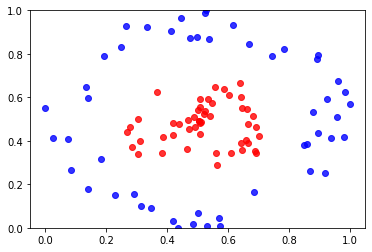

In [32]:
for x, y in zip(train_x, train_y):
    if y == 0:
        plt.scatter(x[0], x[1], c='r', alpha=0.8)
    else:
        plt.scatter(x[0], x[1], c='b', alpha=0.8)
plt.ylim([0, 1])
plt.show()

In [33]:
a = FuzzyMMC(sensitivity=1, exp_bound=0.7, animate=True)

In [34]:
a.fit(train_x, train_y)

In [35]:
a.score(train_x, train_y)

0.47

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Total Boxes         : 2         
Points to plot      : 165       
Animation complete! Video saved at /content/fuzzy_animation.mp4


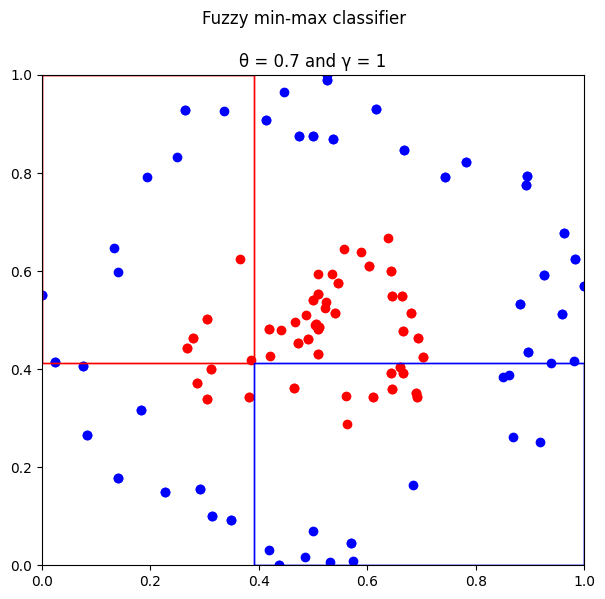

In [36]:

_ = a.animate(frame_rate=5)

In [37]:
video = io.open('/content/fuzzy_animation.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))